# `pandas` Part 8: Using `pandas` to Collect and Analyze Web Data
### Part(a): Reading, Storing, and Cleaning Financial Web Data
### Part(b): Visualizing Data

# Learning Objectives

## After completing this lesson you will be able to:
1. Install a convenient web scraping data collection tool `pandas_datareader`
2. Apply pandas to a "real world" problem/exercise related to stock analysis
3. Scrape/extract data from the web and store in a pandas DataFrame
4. Perform descriptive analytics on stock data
5. Calculate common stock metrics such returns and moving average
6. Visualize data 
 
## Modules needed for this lesson 
>- pandas
>- datetime
>- pandas_datareader, see notes for installation
>- matplotlib


## Files Needed and/or Data Sources:
>- We will use `pandas_datareader` to extract data from YahooFinance


## Initial references for this lesson (more given throughout lesson):
>- Lesson Tutorial: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
>- Pandas Data Reader: https://pandas-datareader.readthedocs.io/en/latest/
>- Datetime module: https://docs.python.org/3/library/datetime.html
>- Matplotlib: https://matplotlib.org/tutorials/index.html

# Pandas Part 8(a): Reading, Storing and Cleaning Financial Data

## Install the `pandas-datareader` module
### Several ways to install the pandas datareader module
1. `pip install pandas-datareader`
>- Mac users would do this in new terminal window
>- Windows users would do this in PowerShell
2. `conda install pandas-datareader`
>- Open Anaconda PowerShell prompt and type the above comands
3. You can also install within a notebook code cell as shown below

#### Note: for all of these options restart jupyter notebooks and/or Anaconda for the changes to take place

##### One way to install the pandas-datareader module is from within jupyter

## Import Necessary Modules

### These are our fundamental modules for working with pandas and reading data from the web

In [9]:
import pandas as pd, datetime
import pandas_datareader as pdr

### The following are needed for the data visualization component of this lesson
>- We will be using a popular python data visualization module name, `matplotlib` 
>- Below is a link for various tutorials on `matplotlib`. A lot of cool stuff here! 
>>- https://matplotlib.org/tutorials/index.html

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

## Set up variables to define our start and end dates for stock analysis
>- We will look at stock prices over the past 10 years

In [10]:
start = datetime.datetime(2009,4,14)
end = datetime.datetime(2020, 4, 14)

## Create a DataFrame by Reading Data from YahooFinance
>- To see other data sources check out the following link:
https://github.com/wilsonfreitas/awesome-quant#data-sources
>- Initially, we will look at all the data but then we will turn our focus to the `Closing Price`
>- The first example pulls stock data for Apple with the ticker symbol of `aapl` but any stock including ETFs and Index funds can but used

In [14]:
aapl = round(pdr.DataReader('aapl', 'yahoo', start, end),2)

In [15]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-04-14,17.17,16.75,17.08,16.90,113655500.0,14.67
2009-04-15,16.89,16.54,16.74,16.81,103220600.0,14.59
2009-04-16,17.59,16.97,17.03,17.35,148361500.0,15.06
2009-04-17,17.75,17.18,17.31,17.63,124373900.0,15.30
2009-04-20,17.57,17.02,17.39,17.21,116616500.0,14.94


In [16]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-07,271.70,259.00,270.80,259.43,50721800.0,259.43
2020-04-08,267.37,261.23,262.74,266.07,42223800.0,266.07
2020-04-09,270.07,264.70,268.70,267.99,40529100.0,267.99
2020-04-13,273.70,265.83,268.31,273.25,32663400.0,273.25
2020-04-14,288.04,278.05,280.00,287.87,41262307.0,287.87


## What are the metadata and basic statistics for our DataFrame?
>- Note: metadata is data about data (e.g., number of records and fields, data types, primary/foreign keys, etc)

### Some Metadata and Descriptive Questions to Answer
1. How many days of stock prices do we have in our DataFrame? 
2. How many fields do we have to work with? 
3. What kind of data do we have to work with? 
4. What are the descriptive statistics for all the fields in the DataFrame?
5. Then, we will answer some other descriptive analytics questions. 

##### How many records and fields do we have to work with?
>- Note: records in this example represent the number of days of stock data we have

In [17]:
aapl.shape[0]

2770

##### What kind of data do we have to work with?

In [18]:
aapl.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

##### What are the descriptive statistics on Apple's stock?

In [20]:
round(aapl.describe(),2)

,High,Low,Open,Close,Volume,Adj Close
count,2770.00,2770.00,2770.00,2770.00,2.770000e+03,2770.00
mean,110.22,108.14,109.17,109.22,7.750559e+07,103.08
std,65.50,64.16,64.75,64.89,5.861936e+07,66.08
min,16.89,16.54,16.74,16.81,1.136200e+07,14.59
25%,59.06,57.59,58.42,58.38,3.224628e+07,51.06
50%,97.70,95.88,96.84,96.83,5.996420e+07,89.78
75%,153.80,150.02,151.72,152.48,1.070018e+08,146.82
max,327.85,323.35,324.74,327.20,4.702495e+08,327.20


## Prepare Data: Define New Variables and Create Common Financial Variables

### Question: How has Apple's adjusted closing price performed over the last 10 years? 
>- We have already calculated descriptive statistics for all fields but let's do it just for 'Adj Close'

#### Define a variable for adjusted close and run some descriptive stats on it

In [21]:
aclose = aapl['Adj Close']

In [22]:
aclose.tail()

Date
2020-04-07    259.43
2020-04-08    266.07
2020-04-09    267.99
2020-04-13    273.25
2020-04-14    287.87
Name: Adj Close, dtype: float64

In [23]:
aclose.describe()

count    2770.000000
mean      103.078549
std        66.083574
min        14.590000
25%        51.057500
50%        89.785000
75%       146.815000
max       327.200000
Name: Adj Close, dtype: float64

In [24]:
aclose.head()

Date
2009-04-14    14.67
2009-04-15    14.59
2009-04-16    15.06
2009-04-17    15.30
2009-04-20    14.94
Name: Adj Close, dtype: float64

## Create Variables for Common Financial Metrics

### An Important Financial Metric:  Returns

Returns: $R_t = (P_t/P_{t-1}) - 1$

>- Where, 
>>- $R_t$ = return at time, t
>>- $P_t$ = the price at time, t
>>- $P_{t-1}$ is the price at time, t- 1 (the day before in our example)


#### To calculate daily returns...

In [28]:
dayret = (aclose/aclose.shift(1)) - 1

dayret.tail()


Date
2020-04-07   -0.011582
2020-04-08    0.025595
2020-04-09    0.007216
2020-04-13    0.019628
2020-04-14    0.053504
Name: Adj Close, dtype: float64

#### Note: The `shift()` function essentially takes all the data in the original column and moves/shifts it by the number passed to it
>- In our example, we used `shift(1)` which takes aclose and shifts all the values 1 day

#### To see how `shift()` is working, we can create a DataFrame to store the current day price and a lag (prior day) price

In [32]:
aclose_shift1 = pd.DataFrame({'DayPrice': aclose,
                             'PriorDayPrice': aclose.shift(1),
                             'DayRet': round(dayret,3),
                             },
                             index = aclose.index)

aclose_shift1

,DayPrice,PriorDayPrice,DayRet
Date,,,
2009-04-14,14.67,NaN,NaN
2009-04-15,14.59,14.67,-0.005
2009-04-16,15.06,14.59,0.032
2009-04-17,15.30,15.06,0.016
2009-04-20,14.94,15.30,-0.024
...,...,...,...
2020-04-07,259.43,262.47,-0.012
2020-04-08,266.07,259.43,0.026
2020-04-09,267.99,266.07,0.007


#### Note: To get annualized returns you could use `shift(252)` or `shift(253)`
>- Most years have 252 or 253 trading days: https://en.wikipedia.org/wiki/Trading_day 

### Moving average (aka rolling average)

>- A moving average is a constantly updated average based on the 'n' past observations where 'n' is user specified. For example if we want the moving average for the past 10 days we would set n=10
>- Stock analysts will use moving averages for the past 50, 100, 200, etc
>>- We will look at moving averages for 50 and 100 days in this lesson
>>- We can use `field.rolling(window='n').mean()` syntax to define moving averages for the past 'n' observations
>>- Where:
>>>- `field` is a numeric value you want to calculate a rolling mean for
>>>- `n` is the number of periods you want to use to calculate the rolling mean

#### Define closing price moving averages for `50` and `100` days

In [33]:
sma50 = aclose.rolling(window=50).mean()
sma100 = aclose.rolling(window=100).mean()

In [35]:
sma50.tail(10)

Date
2020-03-31    290.6862
2020-04-01    289.1880
2020-04-02    287.7476
2020-04-03    286.2064
2020-04-06    285.1046
2020-04-07    284.1288
2020-04-08    283.1114
2020-04-09    281.9998
2020-04-13    281.0028
2020-04-14    280.5846
Name: Adj Close, dtype: float64

### Now, let's answer some descriptive analytics questions

##### What was the adjusted closing price one year ago (April 12th, 2019)?

In [36]:
aclose['4-12-2019']

196.3

In [41]:
# another way to do the same thing

aclose.loc['4-12-2019'] #same as aclose.loc[aclose.index=='4-12-2019']

196.3

##### On what date did the maximum adjusted price occur? 

In [50]:
aclose.loc[aclose == max(aclose)]
#aclose.max() does not return date 


Date
2020-02-12    327.2
Name: Adj Close, dtype: float64

##### On what date did the minimum price occur? 

In [51]:
aclose.loc[aclose == min(aclose)]

Date
2009-04-15    14.59
Name: Adj Close, dtype: float64

##### How many days was the closing price above a $50?
>- Several ways to get this answer

In [52]:
#using where
aclose.where(aclose>50).dropna().count()

2098

In [54]:
# Using loc[]

aclose.loc[aclose>50].count() #dont need to drop na


2098

##### What were the daily adjusted closing prices in the month of October (usually around the time Apple releases a new iPhone)? 

In [55]:
aclose['10-1-19':'10-31-19']

Date
2019-10-01    223.39
2019-10-02    217.79
2019-10-03    219.64
2019-10-04    225.79
2019-10-07    225.84
2019-10-08    223.20
2019-10-09    225.81
2019-10-10    228.86
2019-10-11    234.95
2019-10-14    234.61
2019-10-15    234.06
2019-10-16    233.12
2019-10-17    234.02
2019-10-18    235.14
2019-10-21    239.22
2019-10-22    238.68
2019-10-23    241.88
2019-10-24    242.28
2019-10-25    245.26
2019-10-28    247.72
2019-10-29    241.99
2019-10-30    241.96
2019-10-31    247.43
Name: Adj Close, dtype: float64

## Pandas Part(b): Visualize
>- Visualizing data is a fundamental part of any analytics project
>- Data visualization can provide support for both descriptive and predictive analytics
>- Graphs can "speak a thousand words" and can be effectively used on Executive Summaries to convey powerful information to decision makers

### Plot a time series chart of the `adjusted close` price over the last 10 years
>- We will be using the `plot()` function from `matplotlib`. More info can be found at the below link:
>>- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
>- We will also use a popular graphical styling module called `ggplot` = "grammer of graphics"
>>- ggplot reference:  https://github.com/yhat/ggpy

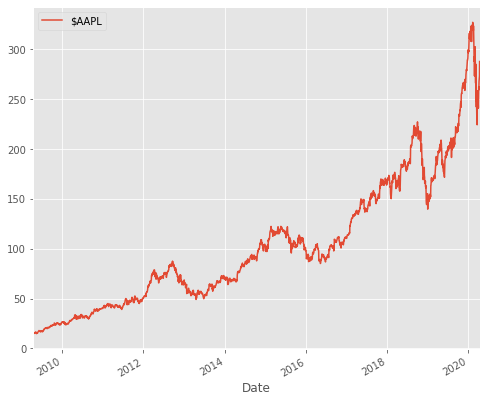

In [58]:
style.use('ggplot')

# Set the figure size 
mpl.rc('figure', figsize =(8,7))

# Use plot() to produce a line plot
aclose.plot(label = '$AAPL')

# Show the legend of the chart 
plt.legend()

#### Let's adjust some features of our graph
>- With `figsize(width,height)` we can adjust the width and height of our chart
>- With `plt.style.use(['dark_background`]) we can make the background black instead of the default white.
>- The link below provides more documentation on the different ways you can customize your charts:
>>- https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html

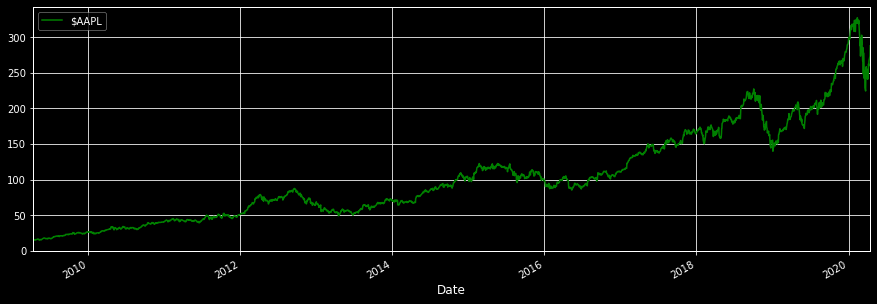

In [67]:
style.use('ggplot')

plt.style.use(['dark_background'])

mpl.rc('figure', figsize=(15,5))

mpl.rc('lines', linewidth=1.5)

aclose.plot(label = '$AAPL', color = 'g')

plt.legend()


### Now, plot the moving averages with the close price
>- Stock analysts look at charts like this to help them decide when to buy and sell

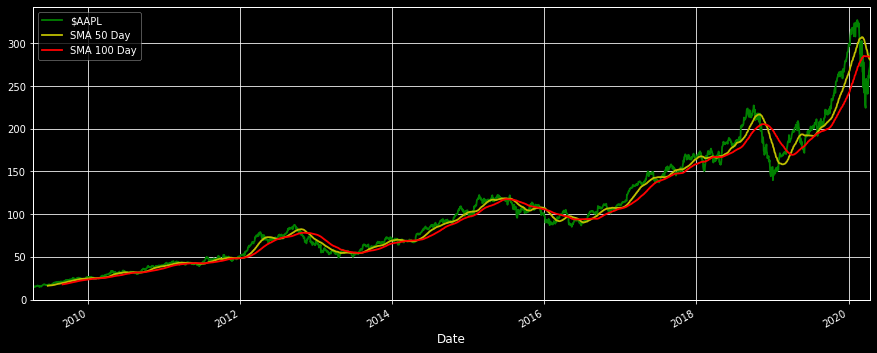

In [71]:
style.use('ggplot')

plt.style.use(['dark_background'])

mpl.rc('figure', figsize=(15,6))

mpl.rc('lines', linewidth=1.8)

aclose.plot(label = '$AAPL', color = 'g')
sma50.plot(label= 'SMA 50 Day', color = 'y')
sma100.plot(label= 'SMA 100 Day', color = 'r')

plt.legend()

## Plotting Returns with the default `plot()` which is a line plot

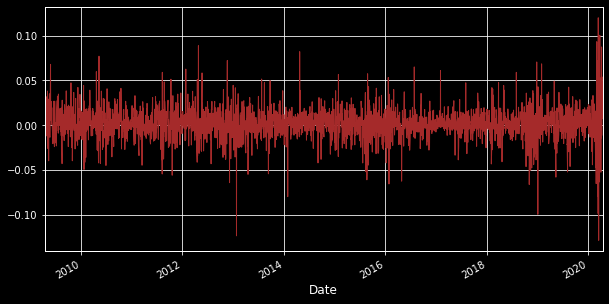

In [77]:
style.use('ggplot')

plt.style.use(['dark_background'])

mpl.rc('figure', figsize =(10, 5))

mpl.rc('lines', linewidth= 1)

dayret.plot(label= 'Daily Returns', color = 'brown')

## Plotting a boxplot for a summary chart on returns
### Boxplots show us:
>- Mean, Median, 1st and 3rd quartiles, minimum and maximum values
>>- Reference: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot

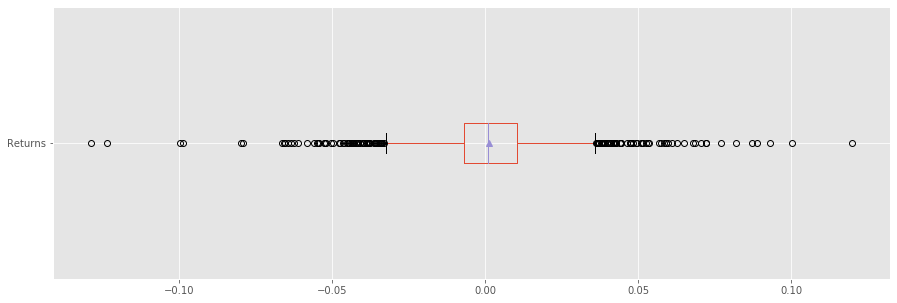

In [86]:
style.use('ggplot')

mpl.rc('figure', figsize = (15,5))

mpl.rc('lines', linewidth=1.75)

dayret.plot(kind='box', showmeans=True, vert=False, label='Returns')